In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## Считывание датасета и просмотр статистик с визуализациями

In [2]:
df = pd.read_csv("breast-cancer-wisconsin-data.zip", compression="zip")

In [3]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [5]:
# Удаляем лишние колонки
df.drop(columns=['id', 'Unnamed: 32'], inplace = True)

In [6]:
df.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

In [7]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
df.describe(include=['object'])

diagnosis
count        569
unique         2
top            B
freq         357

## Гистограммы/распределения признаков по целевой переменной

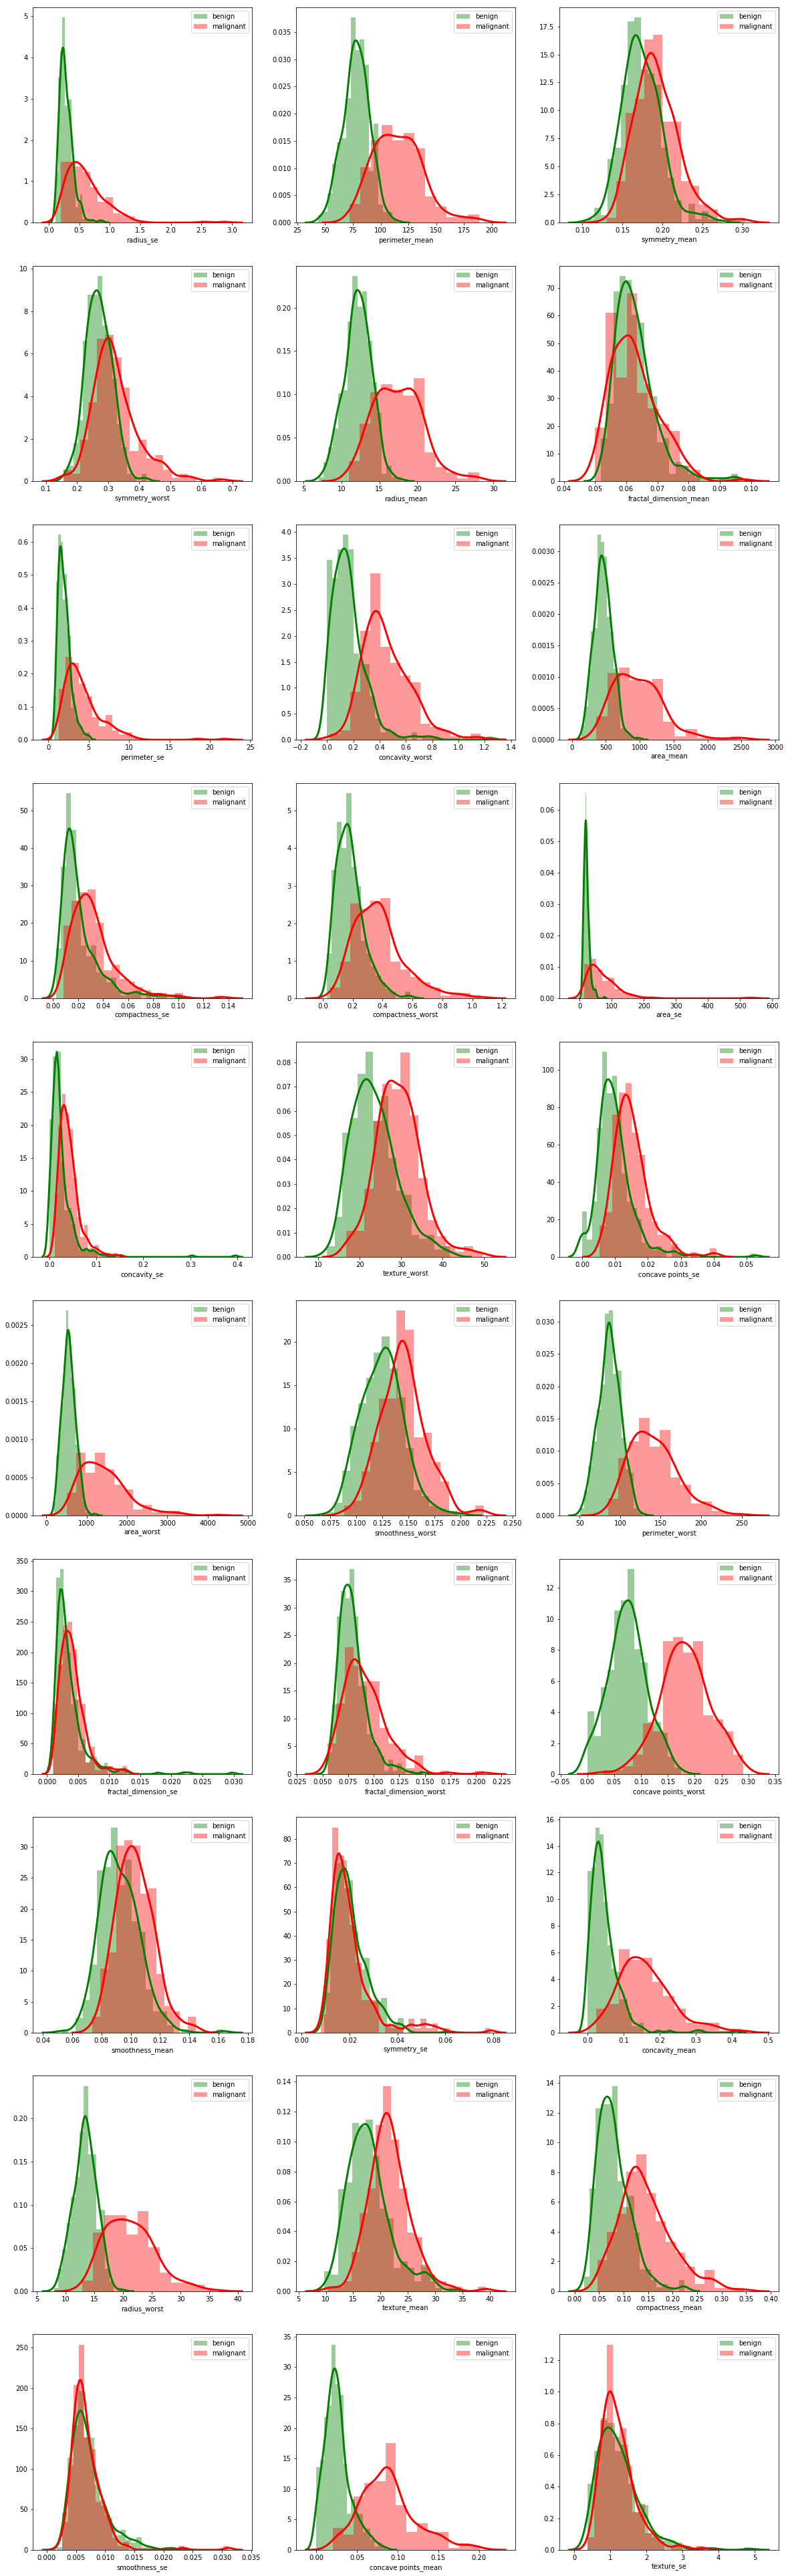

In [9]:
v = set(df.columns) - set(["diagnosis"])
fig, axs = plt.subplots(10, 3, figsize=(20, 70))
j = 0
for i in v:
    ax = axs[j//3,j%3]
    ax = sns.distplot(df.loc[df['diagnosis'] == 'B', i], color="g", label="benign", ax=ax, kde_kws={'linewidth':3})
    ax = sns.distplot(df.loc[df['diagnosis'] == 'M', i], color="r", label="malignant", ax=ax, kde_kws={'linewidth':3})
    ax.legend()
    j += 1

## Heatmap для матрицы корреляций

In [10]:
# Подсчет корреляции между колонками
Corr = df[v].corr()
Corr

radius_se  perimeter_mean  symmetry_mean  \
radius_se                 1.000000        0.691765       0.303379   
perimeter_mean            0.691765        1.000000       0.183027   
symmetry_mean             0.303379        0.183027       1.000000   
symmetry_worst            0.094543        0.189115       0.699826   
radius_mean               0.679090        0.997855       0.147741   
fractal_dimension_mean    0.000111       -0.261477       0.479921   
perimeter_se              0.972794        0.693135       0.313893   
concavity_worst           0.380585        0.563879       0.433721   
area_mean                 0.732562        0.986507       0.151293   
compactness_se            0.356065        0.250744       0.421659   
compactness_worst         0.287103        0.455774       0.473200   
area_se                   0.951830        0.744983       0.223970   
concavity_se              0.332358        0.228082       0.342627   
texture_worst             0.194799        0.303038       0.090651   
concave points_se         0.513346        0.407217       0.393298   
area_worst                0.751548        0.941550       0.177193   
smoothness_worst          0.141919        0.150549       0.426675   
perimeter_worst           0.719684        0.970387       0.219169   
fractal_dimension_se      0.227754       -0.005523       0.331786   
fractal_dimension_worst   0.049559        0.051019       0.438413   
concave points_worst      0.531062        0.771241       0.430297   
smoothness_mean           0.301467        0.207278       0.557775   
symmetry_se               0.240567       -0.081629       0.449137   
concavity_mean            0.631925        0.716136       0.500667   
radius_worst              0.715065        0.969476       0.185728   
texture_mean              0.275869        0.329533       0.071401   
compactness_mean          0.497473        0.556936       0.602641   
smoothness_se             0.164514       -0.202694       0.187321   
concave points_mean       0.698050        0.850977       0.462497   
texture_se                0.213247       -0.086761       0.128053   

                         symmetry_worst  radius_mean  fractal_dimension_mean  \
radius_se                      0.094543     0.679090                0.000111   
perimeter_mean                 0.189115     0.997855               -0.261477   
symmetry_mean                  0.699826     0.147741                0.479921   
symmetry_worst                 1.000000     0.163953                0.334019   
radius_mean                    0.163953     1.000000               -0.311631   
fractal_dimension_mean         0.334019    -0.311631                1.000000   
perimeter_se                   0.109930     0.674172                0.039830   
concavity_worst                0.532520     0.526911                0.346234   
area_mean                      0.143570     0.987357               -0.283110   
compactness_se                 0.277878     0.206000                0.559837   
compactness_worst              0.614441     0.413463                0.458798   
area_se                        0.074126     0.735864               -0.090170   
concavity_se                   0.197788     0.194204                0.446630   
texture_worst                  0.233027     0.297008               -0.051269   
concave points_se              0.143116     0.376169                0.341198   
area_worst                     0.209146     0.941082               -0.231854   
smoothness_worst               0.493838     0.119616                0.504942   
perimeter_worst                0.269493     0.965137               -0.205151   
fractal_dimension_se           0.111094    -0.042641                0.688132   
fractal_dimension_worst        0.537848     0.007066                0.767297   
concave points_worst           0.502528     0.744214                0.175325   
smoothness_mean                0.394309     0.170581                0.584792   
symmetry_se                    0.389402    -0

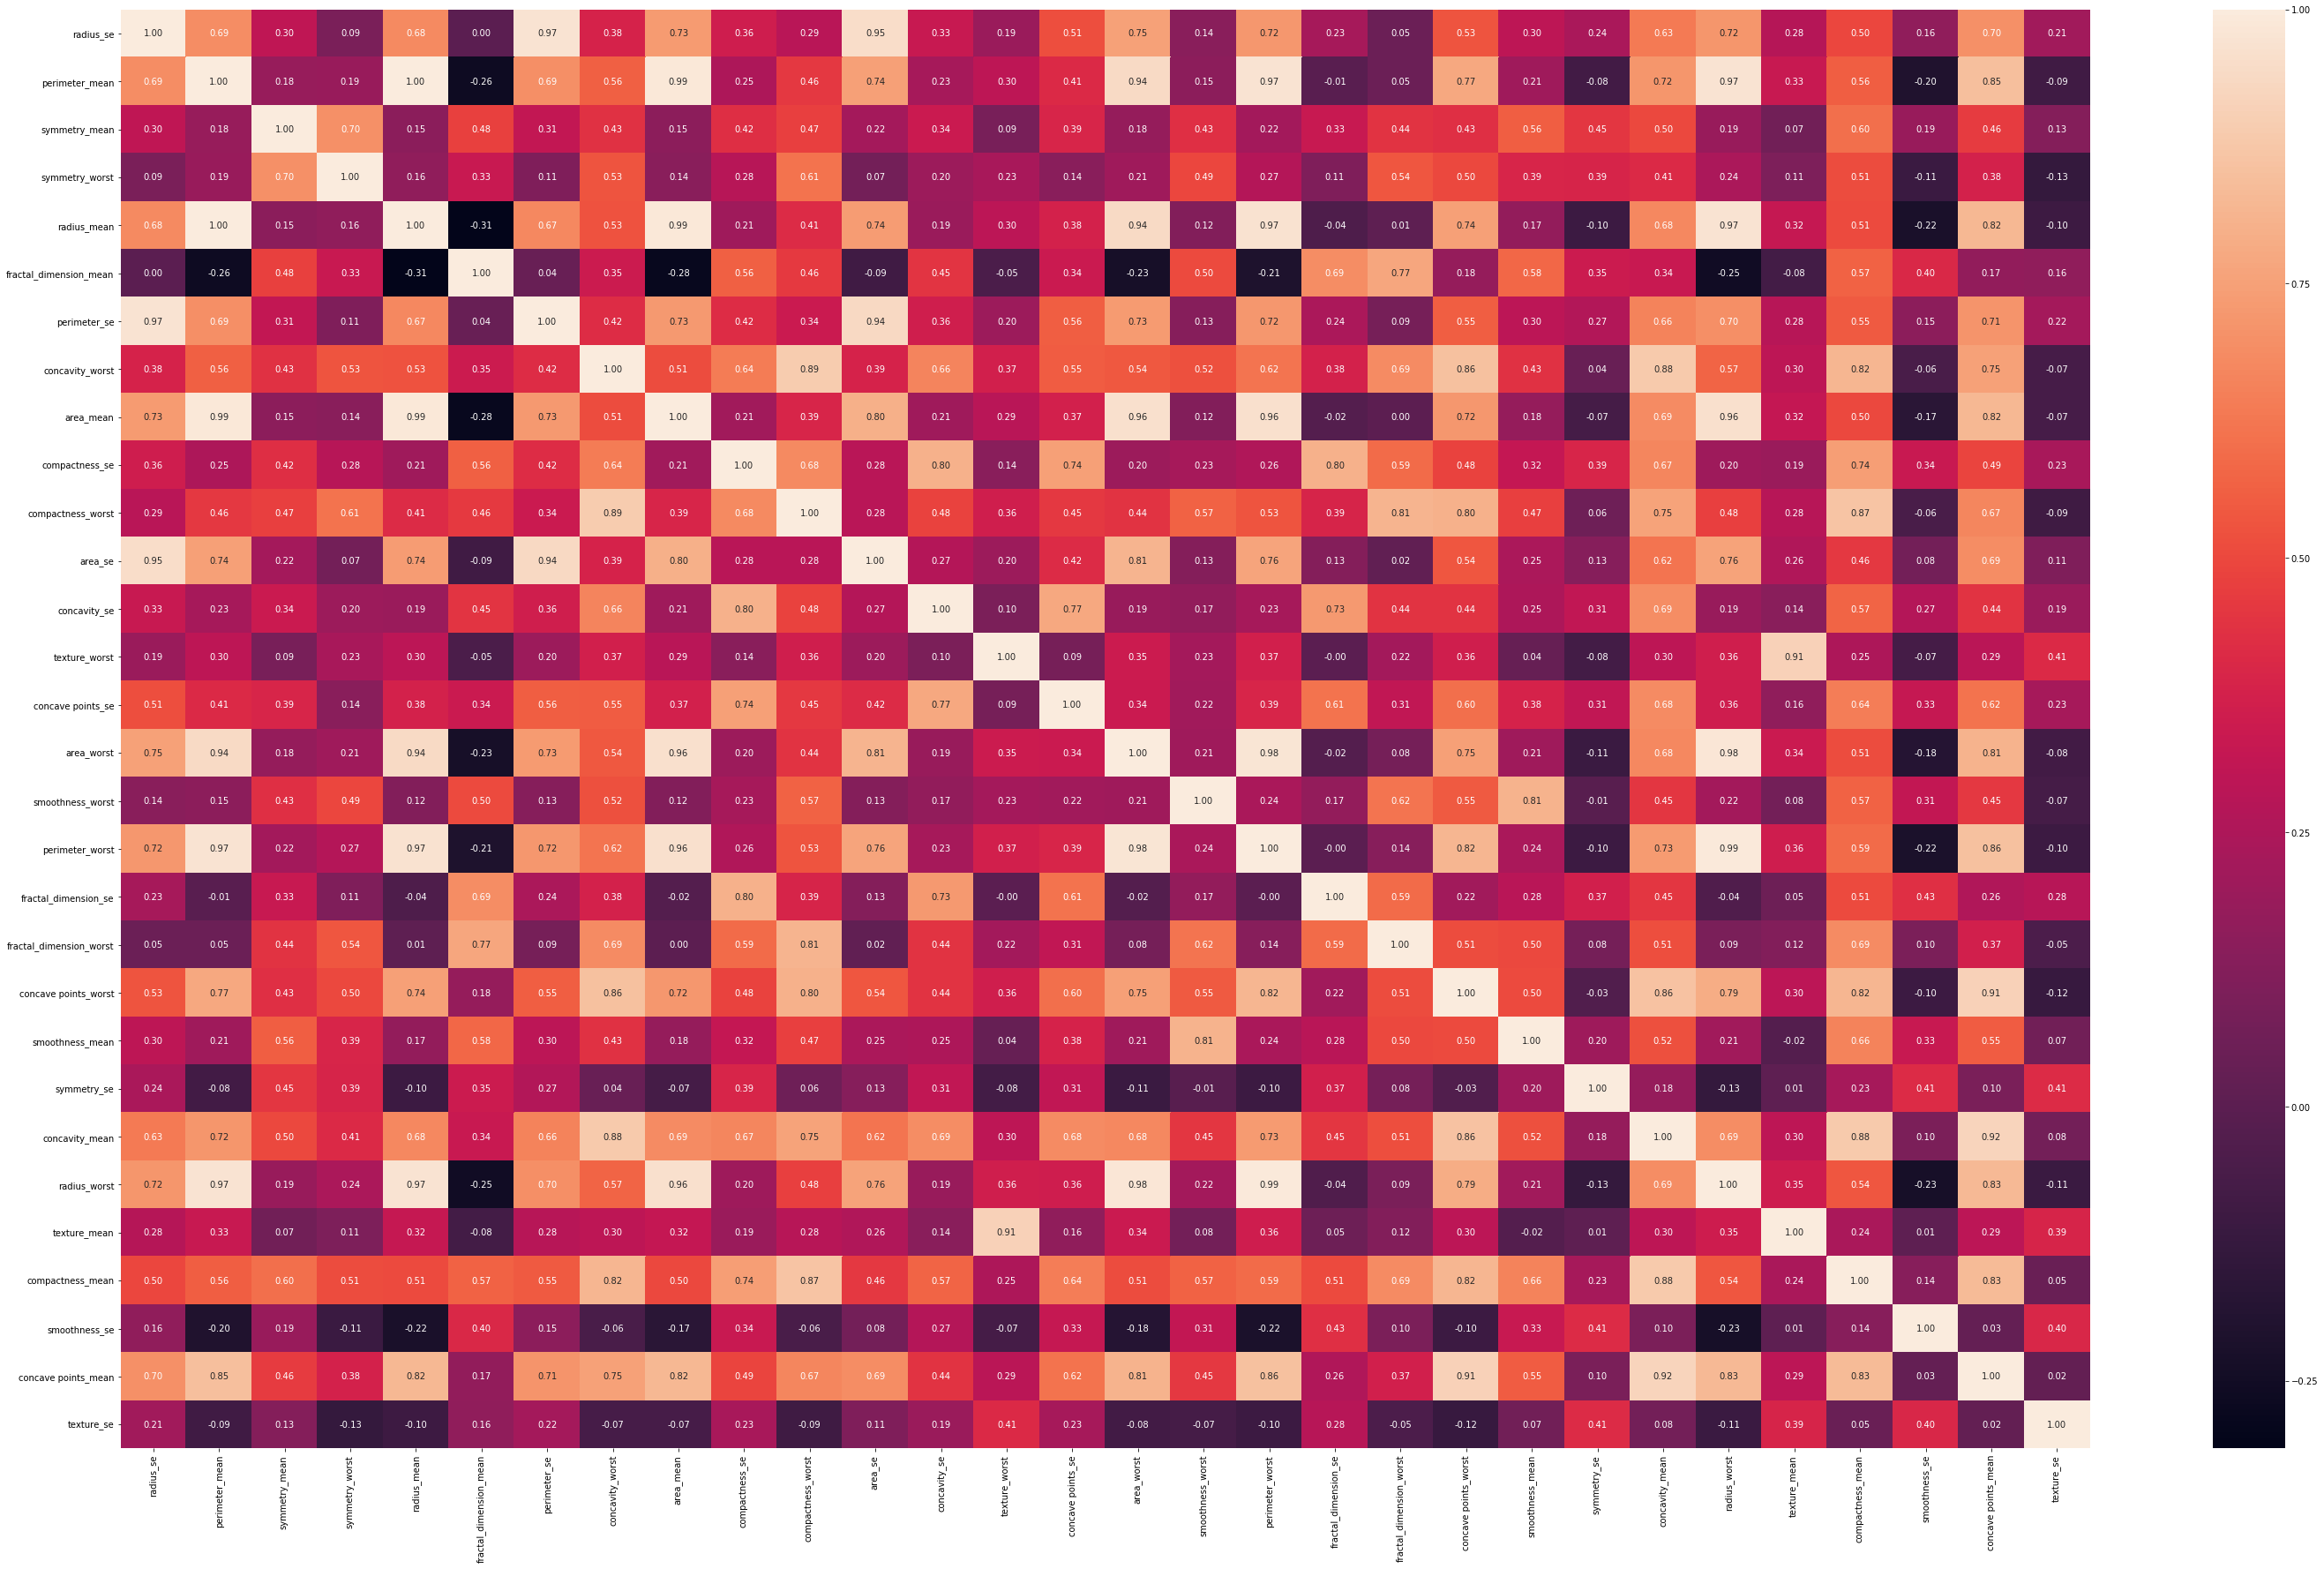

In [11]:
# Рисуем тепловую карту для корреляций
plt.figure(figsize=(50,30))
sns.heatmap(Corr, annot=True, fmt='.2f')
plt.show()

In [12]:
#Сильно скоррелированные признаки больше 0,85
CorField = list(combinations(Corr.columns, 2))
corr_pair = [(i[0], i[1], Corr.loc[i]) for i in CorField if Corr.loc[i] >= 0.85]
corr_pair

[('radius_se', 'perimeter_se', 0.9727936770160752),
 ('radius_se', 'area_se', 0.95183011211099),
 ('perimeter_mean', 'radius_mean', 0.9978552814938113),
 ('perimeter_mean', 'area_mean', 0.9865068039913906),
 ('perimeter_mean', 'area_worst', 0.9415498080023057),
 ('perimeter_mean', 'perimeter_worst', 0.9703868870426388),
 ('perimeter_mean', 'radius_worst', 0.9694763634663142),
 ('perimeter_mean', 'concave points_mean', 0.8509770412528199),
 ('radius_mean', 'area_mean', 0.9873571700566119),
 ('radius_mean', 'area_worst', 0.9410824595860459),
 ('radius_mean', 'perimeter_worst', 0.9651365139559878),
 ('radius_mean', 'radius_worst', 0.9695389726112053),
 ('perimeter_se', 'area_se', 0.9376554069544158),
 ('concavity_worst', 'compactness_worst', 0.8922608987764692),
 ('concavity_worst', 'concave points_worst', 0.8554338603439984),
 ('concavity_worst', 'concavity_mean', 0.8841026390943831),
 ('area_mean', 'area_worst', 0.9592133256499006),
 ('area_mean', 'perimeter_worst', 0.959119574355266),


In [13]:
# Признаки на удаление
feature_remove = set([i[0] for i in corr_pair])
feature_remove

{'area_mean',
 'area_worst',
 'compactness_worst',
 'concave points_worst',
 'concavity_mean',
 'concavity_worst',
 'perimeter_mean',
 'perimeter_se',
 'perimeter_worst',
 'radius_mean',
 'radius_se',
 'texture_worst'}

In [14]:
df = df[set(df.columns) - feature_remove]

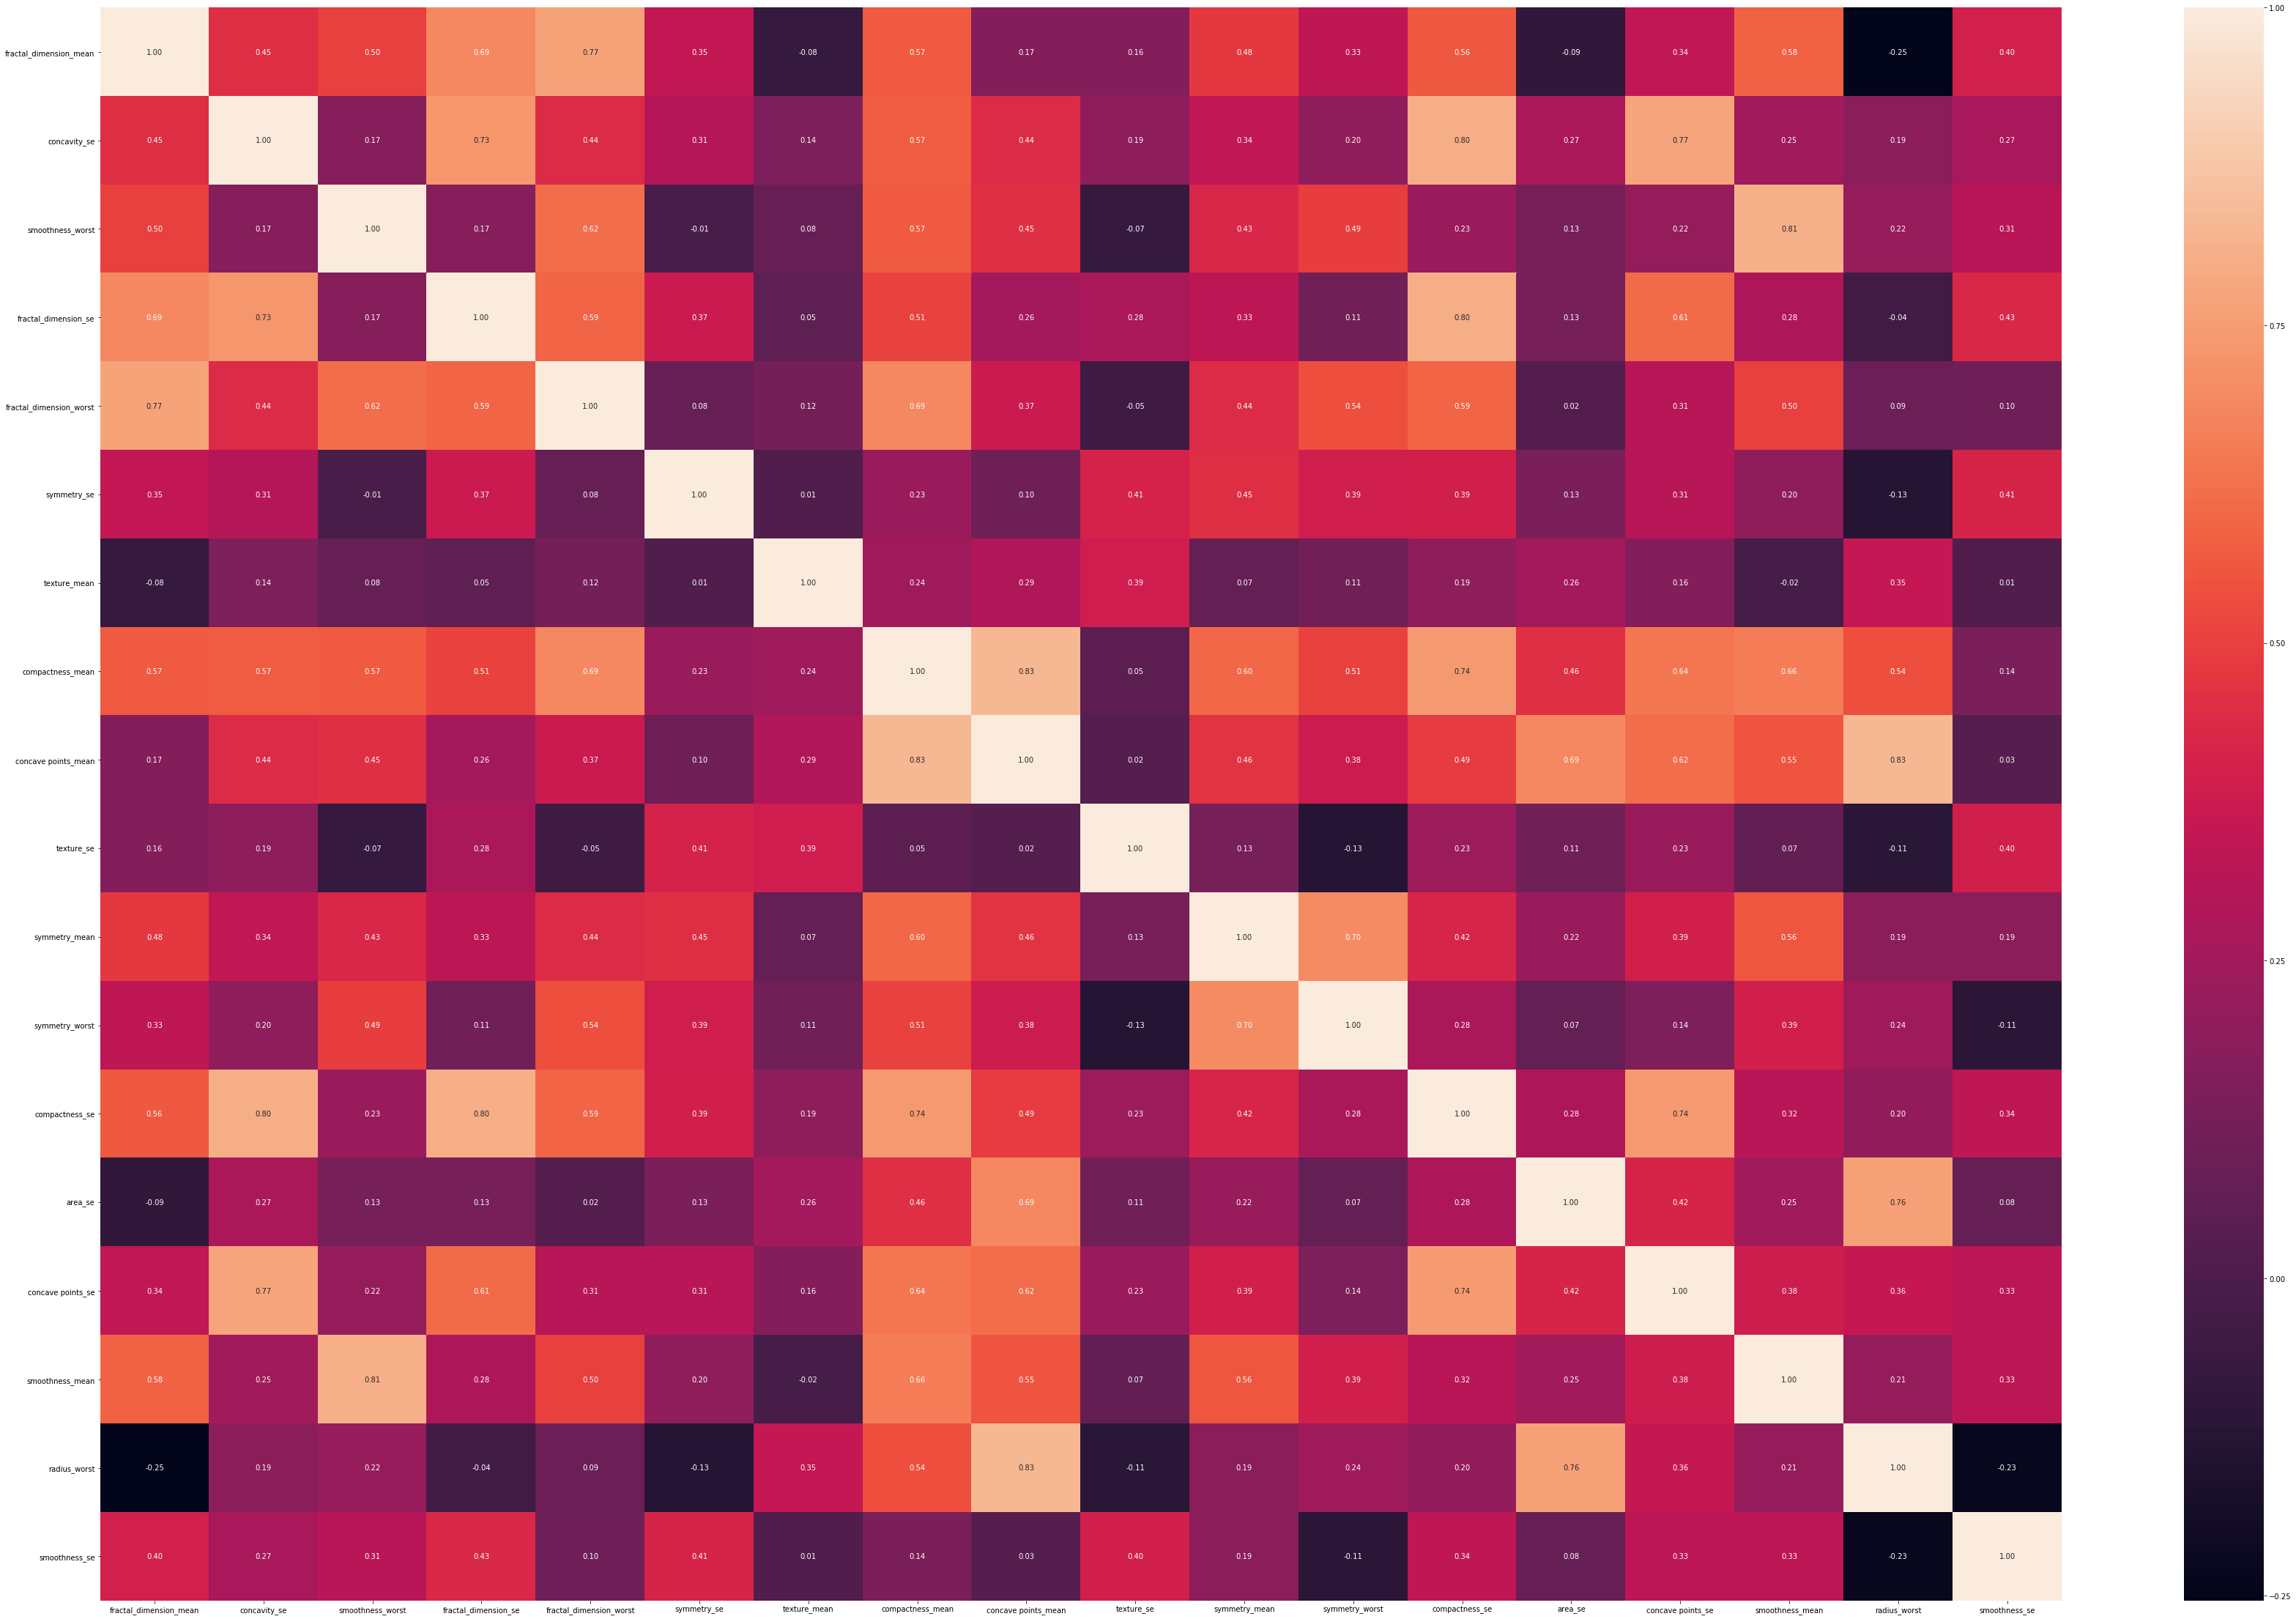

In [15]:
# Рисуем тепловую карту для корреляций
Corr = df.corr()
plt.figure(figsize=(60,40))
sns.heatmap(Corr, annot=True, fmt='.2f')
plt.show()

In [16]:
# Проверяем, что не осталось больше сильно коррелированных признаков >=0,85
CorField = list(combinations(Corr.columns, 2))
corr_pair = [(i[0], i[1], Corr.loc[i]) for i in CorField if Corr.loc[i] >= 0.85]
corr_pair

[]

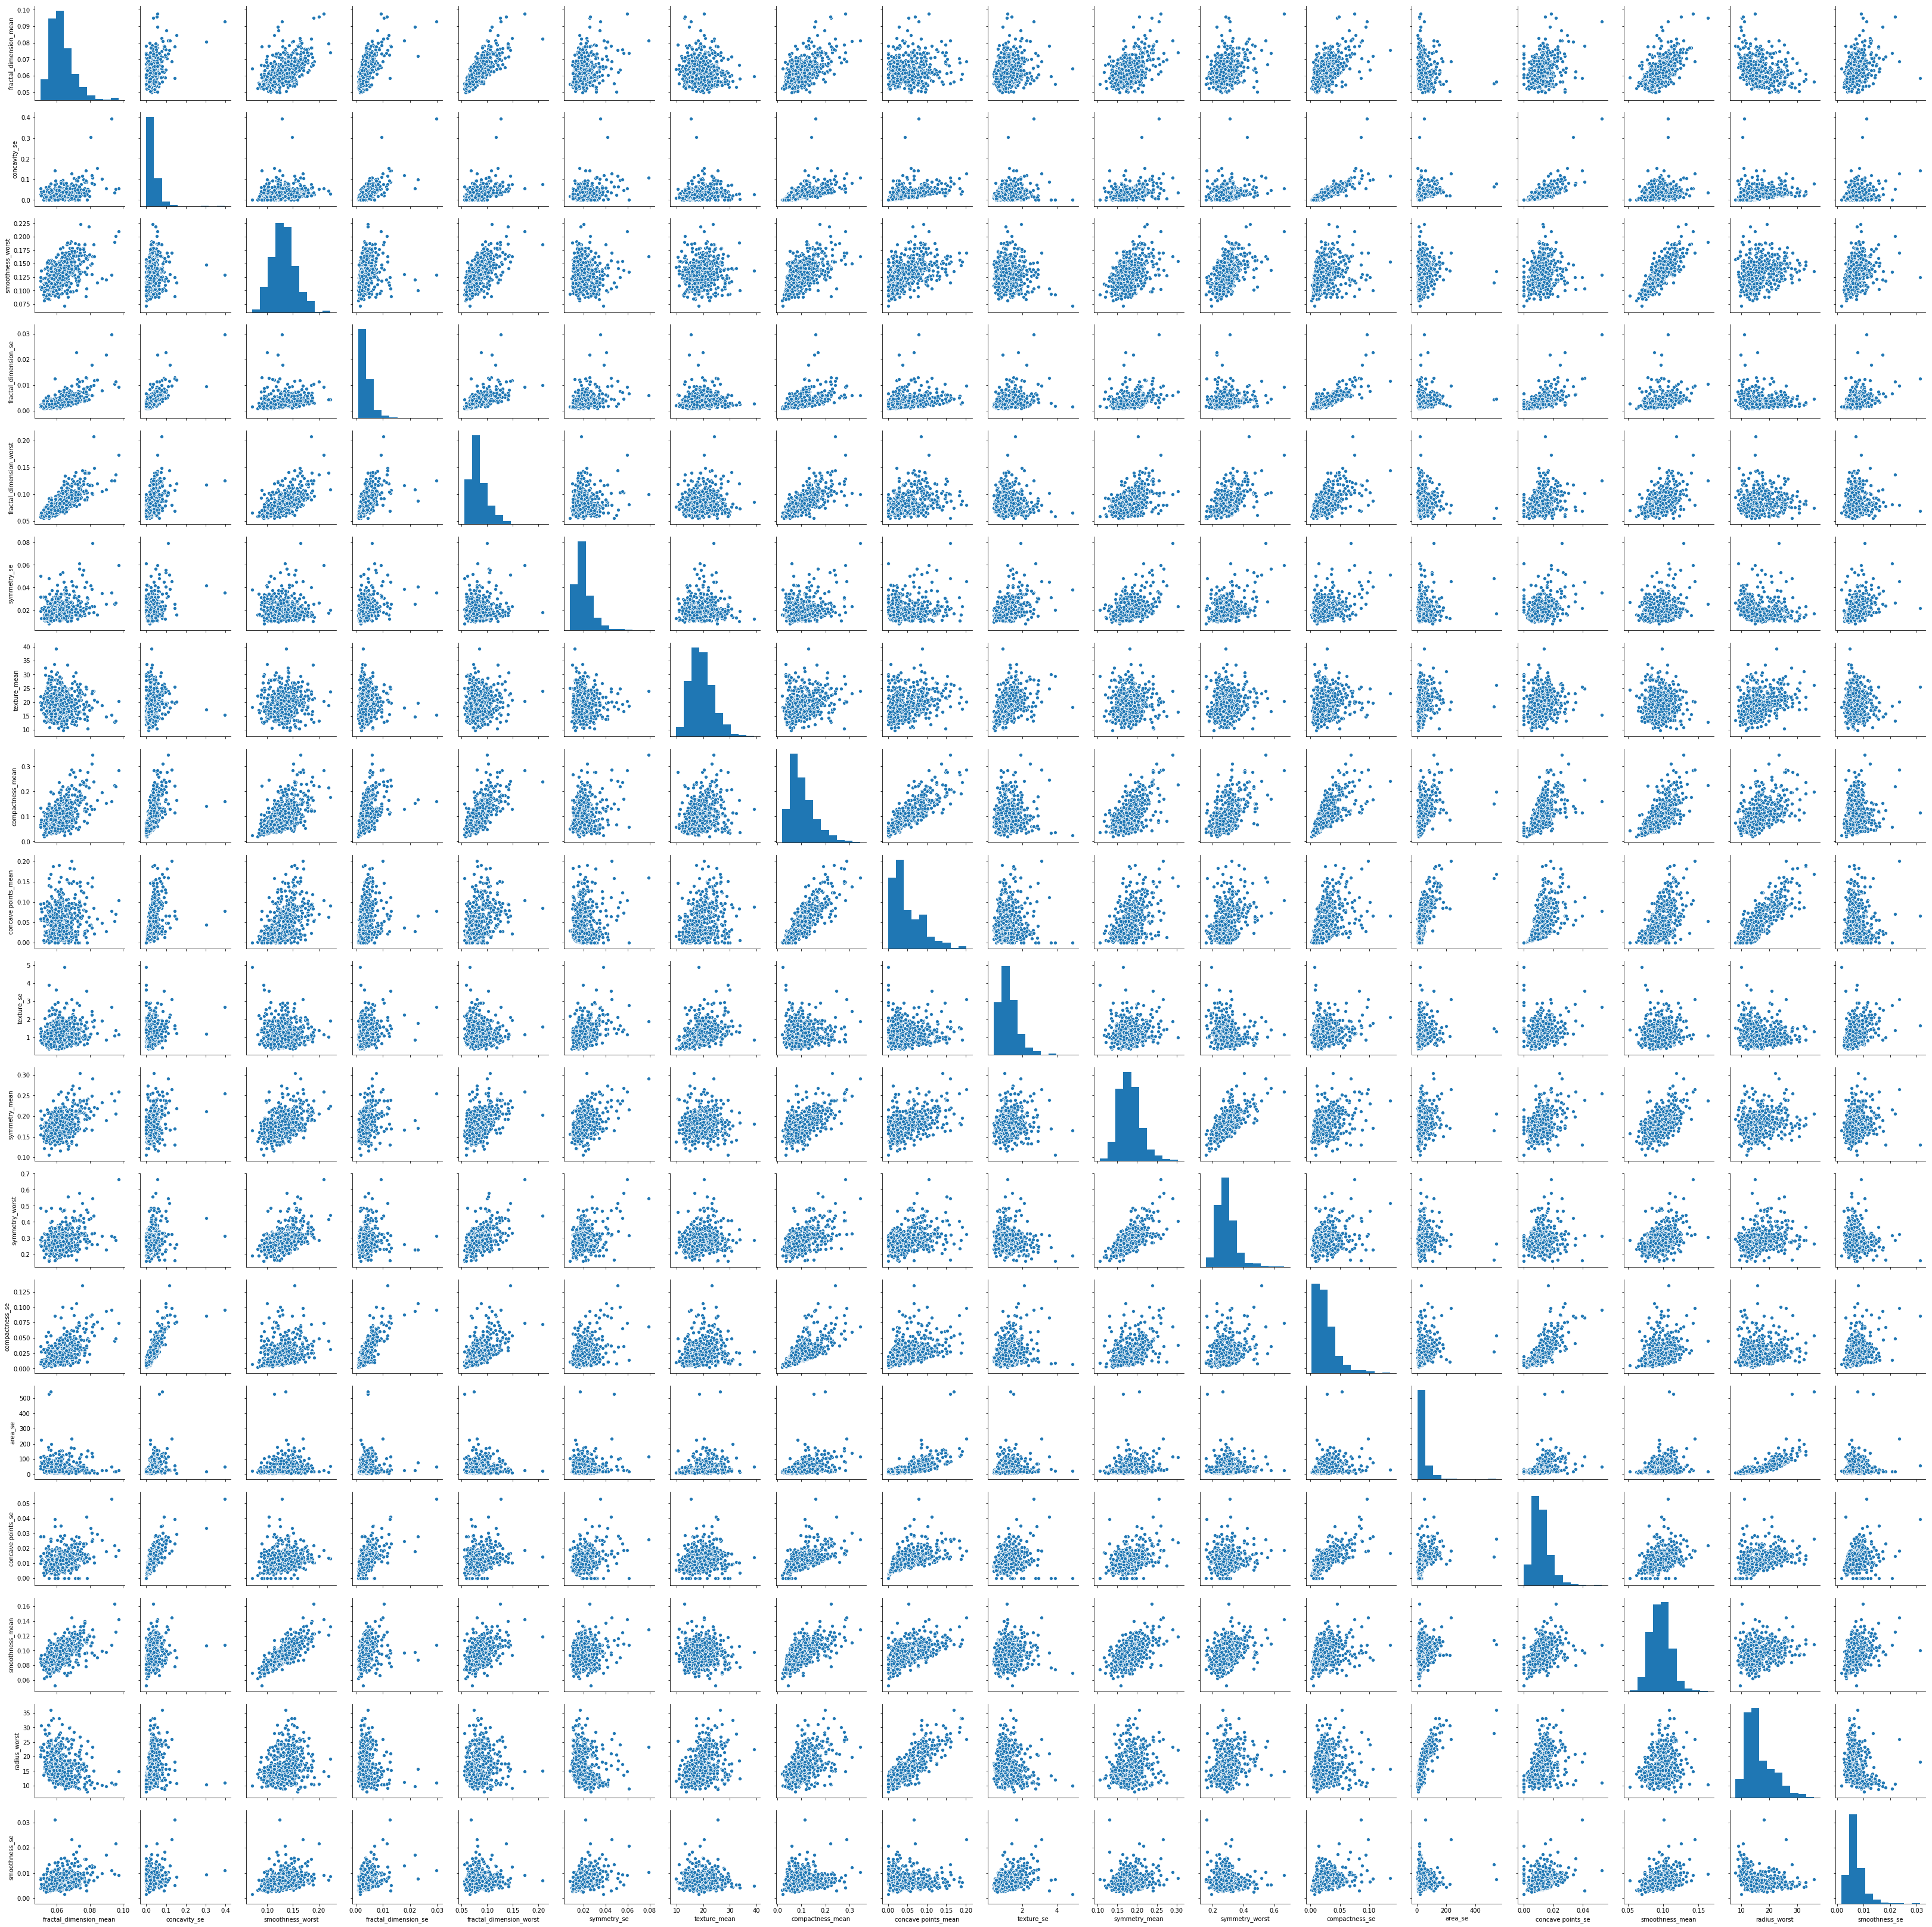

In [17]:
sns.pairplot(df)
plt.show()

In [18]:
# Перекодируем целевую перменную
df['diagnosis'] = df['diagnosis'].apply(lambda x: 1 if x == "M" else 0)

In [19]:
# Разделим датафрейм на тренировочную и тестовую выборки 70/30
df_train, df_test = train_test_split(df, test_size = 0.3)

In [20]:
# Нормализуем признаки. Сначала обучимся на трейне, а потом нормализуем трейн и тест.
scaler = StandardScaler()
v = list(set(df.columns) - set(["diagnosis"]))
scaler.fit(df_train[v])

df_train_scale = scaler.transform(df_train[v])

df_test_scale = scaler.transform(df_test[v])

df_train[v] = df_train_scale
df_test[v] = df_test_scale

In [21]:
df_train.head()

fractal_dimension_mean  concavity_se  smoothness_worst  \
31                 2.136063      0.267166          1.366417   
446               -0.521861      0.112028          0.323811   
73                 0.395638     -0.479817          0.367989   
56                -0.458342     -0.117625          1.308986   
198               -1.068125     -0.190613         -0.025197   

     fractal_dimension_se  fractal_dimension_worst  symmetry_se  texture_mean  \
31               0.630957                 2.948201     0.240285     -0.135988   
446             -0.455702                 0.323967    -0.933282      2.040792   
73              -0.255206                 0.974055    -0.952540     -0.814919   
56              -0.437539                -0.090498    -0.236618     -0.166318   
198             -0.161944                 0.401447    -0.731646      0.748256   

     compactness_mean  concave points_mean  texture_se  symmetry_mean  \
31           0.855130             0.039395   -0.300814       1.825091   
446          0.474084             0.856609   -0.211216      -0.378078   
73           0.409947             0.009712   -1.081453      -0.569169   
56           0.385424             1.040752    0.009917       0.386287   
198          0.689129             0.457065   -0.218842      -0.175746   

     symmetry_worst  diagnosis  compactness_se   area_se  concave points_se  \
31         2.811566          1        0.426786  0.001218          -0.259920   
446        0.084754          1       -0.320483  0.070258          -0.156023   
73        -0.499018          1       -0.293776 -0.411846          -0.454177   
56         0.945933          1       -0.165047  1.440509           0.517735   
198        0.421605          1        0.578483  0.310607           0.018713   

     smoothness_mean  radius_worst  smoothness_se  
31          1.097124      0.081114      -0.492464  
446         0.268808      1.061945      -0.766424  
73          0.324130      0.029053      -0.765442  
56          0.672735      2.021951      -0.195593  
198        -0.848245      1.443032      -0.501302

In [22]:
# Отделим целевую переменную 'diagnosis' от остальных признаков
y_train = df_train['diagnosis']
y_test = df_test['diagnosis']

X_train = df_train.drop('diagnosis', axis=1)
X_test = df_test.drop('diagnosis', axis=1)

## Переходим к построению моделей

### Строим стандартную логистическую регрессию

In [23]:
# Обучим логистическую регрессию на параметрах по умолчанию
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [24]:
# функция для расчета метрик
def print_metrics(y_test,y_pred):
    print('accuracy:', metrics.accuracy_score(y_test, y_pred))
    print('precision:', metrics.precision_score(y_test, y_pred))
    print('recall:', metrics.recall_score(y_test, y_pred))
    print('f1:', metrics.f1_score(y_test, y_pred))
    print('roc_auc:', metrics.roc_auc_score(y_test, y_pred))
    
# функция для построяния roc_auc кривой
def roc_auc(model):
    sns.set(font_scale=1.5)
    sns.set_color_codes("muted")

    plt.figure(figsize=(10, 8))
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1], pos_label=1)
    lw = 2
    plt.plot(fpr, tpr, lw=lw)
    plt.plot([0, 1], [0, 1])
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve {}'.format(np.round(metrics.roc_auc_score(y_test, model.predict(X_test)),2)))
    plt.show()

# функция для построения гистограммы важности признаков    
def feature(model):  
    featureImportance = pd.DataFrame({"feature": df.drop('diagnosis',axis=1).columns, 
                                      "importance": model.coef_.tolist()[0]})

    featureImportance.set_index('feature', inplace=True)
    featureImportance.sort_values(["importance"], ascending=False, inplace=True)
    featureImportance["importance"].plot('bar', figsize=(8, 4))

accuracy: 0.9766081871345029
precision: 0.9591836734693877
recall: 0.9591836734693877
f1: 0.9591836734693877
roc_auc: 0.9713951154232184


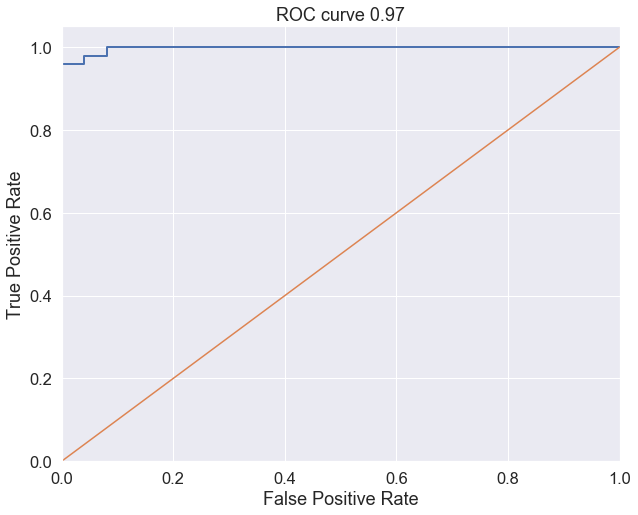

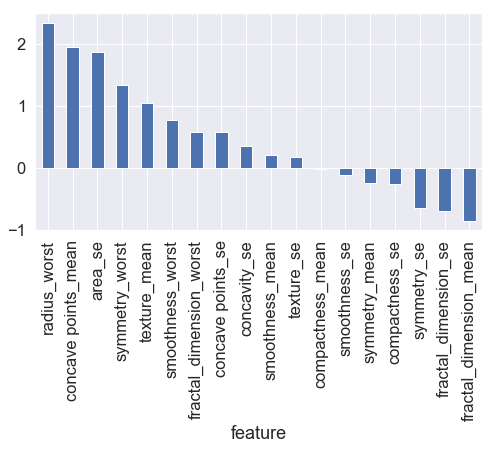

In [25]:
# Посмотрим метрики, roc_auc кривую и признаки
print_metrics(y_test, LR.predict(X_test))
roc_auc(LR)
feature(LR)

### Строим логистическую регрессию c подбором параметра "C" по кроссвалидации

In [26]:
# Обучим новую логистическую регрессию на CV = 5 (версия 0.22)
LRcv = LogisticRegressionCV()
LRcv.fit(X_train, y_train)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

In [27]:
# Коэффициенты С, которые перебирали на кроссвалидации
LRcv.Cs_

array([1.00000000e-04, 7.74263683e-04, 5.99484250e-03, 4.64158883e-02,
       3.59381366e-01, 2.78255940e+00, 2.15443469e+01, 1.66810054e+02,
       1.29154967e+03, 1.00000000e+04])

In [28]:
# Лучший коэффицент С
LRcv.C_[0]

2.782559402207126

accuracy: 0.9766081871345029
precision: 0.9411764705882353
recall: 0.9795918367346939
f1: 0.96
roc_auc: 0.9775008364001339


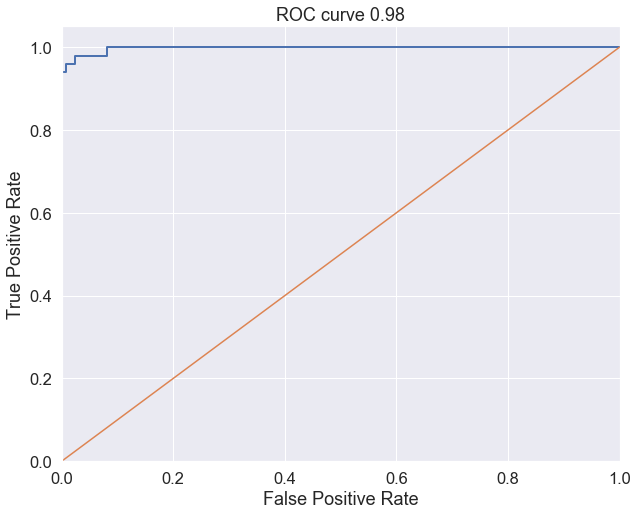

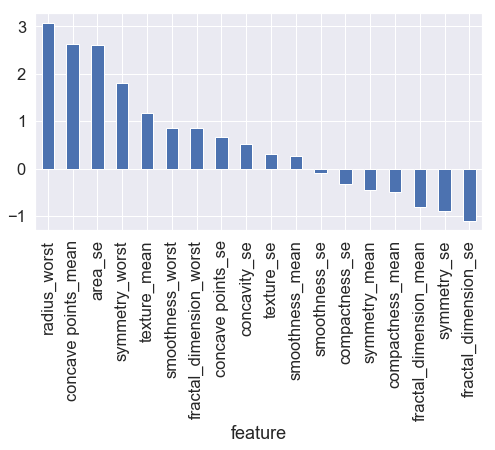

In [29]:
# Посмотрим метрики, roc_auc кривую и признаки.
# Увидим, что метрики, в т.ч. roc_auc, остались на том же уровне с небольшими изменениями.
# Важные признаки тоже мало изменилась, некоторые поменялись местами в ранге важности.
print_metrics(y_test, LRcv.predict(X_test))
roc_auc(LRcv)
feature(LRcv)

### Делаем классификатор ближайших соседей для сравнения с лог. регрессией

In [30]:
# Сравним с классификатором ближайших соседей - KNN
# Подберем наилучшие параметры на метрике F1
knn = KNeighborsClassifier()
parameters = {'n_neighbors' : range(3,61), 'metric': ['euclidean', 'manhattan', 'minkowski', 'wminkowski']}
clf = GridSearchCV(knn, parameters, scoring = 'f1')
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski',
                                    'wminkowski'],
                         'n_neighbors': range(3, 61)},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [31]:
# Лучший F1
clf.best_score_

0.9355491551459293

In [32]:
# Лучшие параметры классификатора KNN
clf.best_params_

{'metric': 'euclidean', 'n_neighbors': 3}

accuracy: 0.935672514619883
precision: 0.8653846153846154
recall: 0.9183673469387755
f1: 0.8910891089108911
roc_auc: 0.9304951488792238


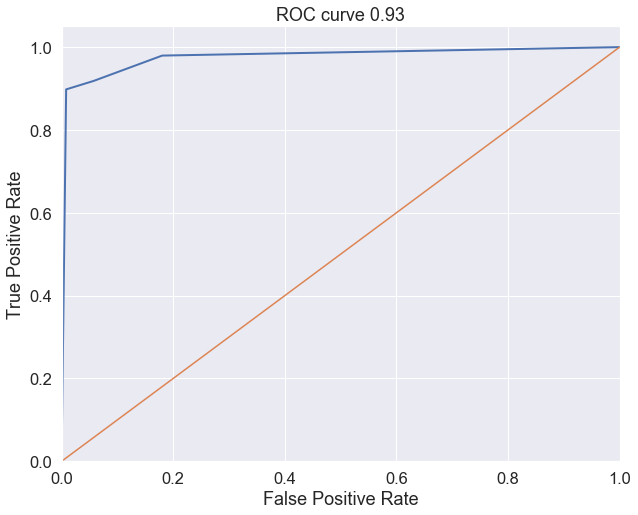

In [33]:
# Посмотрим на метрики и roc_auc кривую.
# Увидим, что этот классификатор отработал хуже на всех метриках, даже на своих лучших параметрах, чем LR на стандартных.
# Хуже, но всё же не критично плохо, качество достойное.
print_metrics(y_test, clf.predict(X_test))
roc_auc(clf)